# LinkedIn Dataset Exploration

## Importing dependencies

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LinearRegression
import re
from gensim.parsing.preprocessing import remove_stopwords

## Importing the dataset

In [2]:
df = pd.read_csv('C:/Users/raksk/Documents/GitHub/internship-project-2207-14/data/ExploreAI social media data - LinkedIn.csv')
df.head()

,Date,Update ID,Update URL,Update title,Update description,Update outbound URL,Update content text,Update submitted image URL,Update share media category,Impressions,Clicks,Likes,Comments,Shares,Engagements,Engagement rate (%)
0,2021-01-10,6753935305323147264,https://www.linkedin.com/feed/update/urn:li:sh...,EXPLORE | Data Science Course Overview,NaN,https://www.youtube.com/watch?v=tCkwnPur7jA&fe...,Register now for our online Data Science cours...,https://media.licdn.com/dms/image/sync/C4E27AQ...,ARTICLE,0,0,20,1,0,21,NaN
1,2021-01-15,6755849417502339072,https://www.linkedin.com/feed/update/urn:li:sh...,Explore Data Science Academy debuts online dat...,Africa’s largest data science academy introduc...,https://www.itweb.co.za/content/WnpNgq2K4YGvVrGd,https://lnkd.in/eYSbrqM,https://media.licdn.com/dms/image/sync/C4E27AQ...,ARTICLE,1,0,78,3,1,82,8200.0
2,2021-02-09,6764822478226259968,https://www.linkedin.com/feed/update/urn:li:sh...,Keep the fun in learning and start learning SQ...,NaN,https://media.licdn.com/dms/image/C4D22AQGgzrJ...,Keep the fun in learning and start learning SQ...,https://media.licdn.com/dms/image/C4D22AQGgzrJ...,IMAGE,3,0,30,0,0,30,1000.0
3,2021-02-10,6765183153402335232,https://www.linkedin.com/feed/update/urn:li:sh...,Did you know that you can do machine learning ...,NaN,https://media.licdn.com/dms/image/C4D22AQEAkvd...,Did you know that you can do machine learning ...,https://media.licdn.com/dms/image/C4D22AQEAkvd...,IMAGE,2,0,28,0,2,30,1500.0
4,2021-02-11,6765545999566938112,https://www.linkedin.com/feed/update/urn:li:sh...,Continuing with this week’s theme on SQL.\r\nH...,NaN,https://media.licdn.com/dms/image/C4D22AQH3Nyh...,Continuing with this week’s theme on SQL.\r\nH...,https://media.licdn.com/dms/image/C4D22AQH3Nyh...,IMAGE,2,0,28,0,1,29,1450.0


## Non-Graphical Exploratory Analysis

In [3]:
df.shape

(288, 16)

To check for missing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         288 non-null    object 
 1   Update ID                    288 non-null    int64  
 2   Update URL                   288 non-null    object 
 3   Update title                 283 non-null    object 
 4   Update description           46 non-null     object 
 5   Update outbound URL          234 non-null    object 
 6   Update content text          283 non-null    object 
 7   Update submitted image URL   232 non-null    object 
 8   Update share media category  250 non-null    object 
 9   Impressions                  288 non-null    int64  
 10  Clicks                       288 non-null    int64  
 11  Likes                        288 non-null    int64  
 12  Comments                     288 non-null    int64  
 13  Shares              

This is to check what percentage of the dataset is missing by column.

In [5]:
df.isnull().sum() / len(df) * 100

Date                            0.000000
Update ID                       0.000000
Update URL                      0.000000
Update title                    1.736111
Update description             84.027778
Update outbound URL            18.750000
Update content text             1.736111
Update submitted image URL     19.444444
Update share media category    13.194444
Impressions                     0.000000
Clicks                          0.000000
Likes                           0.000000
Comments                        0.000000
Shares                          0.000000
Engagements                     0.000000
Engagement rate (%)             2.777778
dtype: float64

We can drop the "Update description" column because it has over 80% of missing data. We will keep the other columns as they do not exceed the 25% threshhold that I have set for this dataset.

In [6]:
df.drop(['Update description'], axis=1, inplace=True)
print(df.shape)
df.head()

(288, 15)


,Date,Update ID,Update URL,Update title,Update outbound URL,Update content text,Update submitted image URL,Update share media category,Impressions,Clicks,Likes,Comments,Shares,Engagements,Engagement rate (%)
0,2021-01-10,6753935305323147264,https://www.linkedin.com/feed/update/urn:li:sh...,EXPLORE | Data Science Course Overview,https://www.youtube.com/watch?v=tCkwnPur7jA&fe...,Register now for our online Data Science cours...,https://media.licdn.com/dms/image/sync/C4E27AQ...,ARTICLE,0,0,20,1,0,21,NaN
1,2021-01-15,6755849417502339072,https://www.linkedin.com/feed/update/urn:li:sh...,Explore Data Science Academy debuts online dat...,https://www.itweb.co.za/content/WnpNgq2K4YGvVrGd,https://lnkd.in/eYSbrqM,https://media.licdn.com/dms/image/sync/C4E27AQ...,ARTICLE,1,0,78,3,1,82,8200.0
2,2021-02-09,6764822478226259968,https://www.linkedin.com/feed/update/urn:li:sh...,Keep the fun in learning and start learning SQ...,https://media.licdn.com/dms/image/C4D22AQGgzrJ...,Keep the fun in learning and start learning SQ...,https://media.licdn.com/dms/image/C4D22AQGgzrJ...,IMAGE,3,0,30,0,0,30,1000.0
3,2021-02-10,6765183153402335232,https://www.linkedin.com/feed/update/urn:li:sh...,Did you know that you can do machine learning ...,https://media.licdn.com/dms/image/C4D22AQEAkvd...,Did you know that you can do machine learning ...,https://media.licdn.com/dms/image/C4D22AQEAkvd...,IMAGE,2,0,28,0,2,30,1500.0
4,2021-02-11,6765545999566938112,https://www.linkedin.com/feed/update/urn:li:sh...,Continuing with this week’s theme on SQL.\r\nH...,https://media.licdn.com/dms/image/C4D22AQH3Nyh...,Continuing with this week’s theme on SQL.\r\nH...,https://media.licdn.com/dms/image/C4D22AQH3Nyh...,IMAGE,2,0,28,0,1,29,1450.0


Checking for Duplicates in the dataset.

In [7]:
len(df.duplicated(keep=False))

288

## Graphical Exploratory Analysis

Firstly, let's start by exploring the numerical columns of the dataset. These include columns like "Impressions", "Clicks", "Likes", "Comments", "Shares", "Engagements" and "Engagement rate".

In [8]:
df_num = df[['Impressions', 'Clicks', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement rate (%)']]
df_corr = df_num.corr()
df_corr

,Impressions,Clicks,Likes,Comments,Shares,Engagements,Engagement rate (%)
Impressions,1.000000,0.623587,0.690763,0.603637,0.368730,0.695284,-0.180848
Clicks,0.623587,1.000000,0.328362,0.412669,0.334469,0.988306,-0.071383
Likes,0.690763,0.328362,1.000000,0.688515,0.352067,0.467350,0.008246
Comments,0.603637,0.412669,0.688515,1.000000,0.272911,0.503165,-0.020806
Shares,0.368730,0.334469,0.352067,0.272911,1.000000,0.384591,-0.061618
Engagements,0.695284,0.988306,0.467350,0.503165,0.384591,1.000000,-0.066616
Engagement rate (%),-0.180848,-0.071383,0.008246,-0.020806,-0.061618,-0.066616,1.000000


<AxesSubplot:>

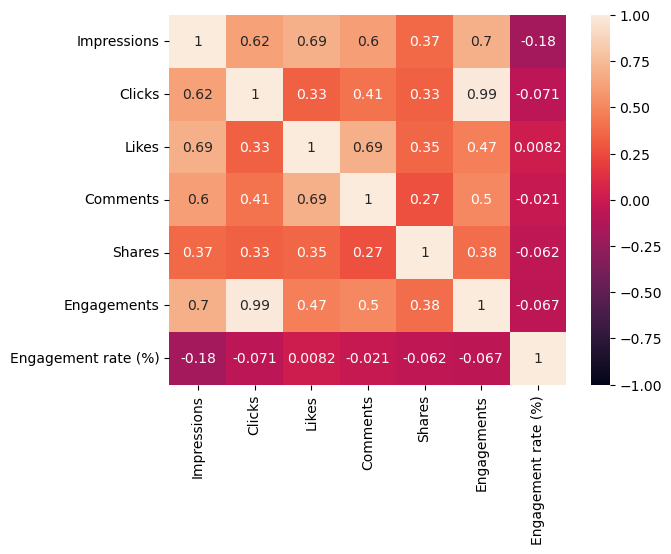

In [9]:
sns.heatmap(df_corr, vmin=-1, annot=True)

In [10]:
fig = px.imshow(df_corr, text_auto=True, color_continuous_scale='rdbu')
fig.layout.height = 850
fig.layout.width = 850
fig.show()

In [11]:
px.scatter(df_num, x='Clicks', y='Engagements', color='Clicks')

In [12]:
line_plot = df[['Date', 'Impressions', 'Clicks', 'Shares', 'Comments', 'Engagements', 'Likes']].groupby(['Date']).sum().reset_index()

In [13]:
px.line(line_plot, x='Date', y='Impressions')

In [14]:
px.line(line_plot, x='Date', y='Clicks', color_discrete_sequence=px.colors.qualitative.Plotly_r)

In [15]:
px.line(line_plot, x='Date', y='Shares', color_discrete_sequence=px.colors.qualitative.T10)

In [16]:
px.line(line_plot, x='Date', y='Comments', color_discrete_sequence=px.colors.qualitative.Antique)

In [17]:
px.line(line_plot, x='Date', y='Engagements', color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [18]:
px.line(line_plot, x='Date', y='Likes', color_discrete_sequence=px.colors.qualitative.Light24_r)

In [19]:
df.head()

,Date,Update ID,Update URL,Update title,Update outbound URL,Update content text,Update submitted image URL,Update share media category,Impressions,Clicks,Likes,Comments,Shares,Engagements,Engagement rate (%)
0,2021-01-10,6753935305323147264,https://www.linkedin.com/feed/update/urn:li:sh...,EXPLORE | Data Science Course Overview,https://www.youtube.com/watch?v=tCkwnPur7jA&fe...,Register now for our online Data Science cours...,https://media.licdn.com/dms/image/sync/C4E27AQ...,ARTICLE,0,0,20,1,0,21,NaN
1,2021-01-15,6755849417502339072,https://www.linkedin.com/feed/update/urn:li:sh...,Explore Data Science Academy debuts online dat...,https://www.itweb.co.za/content/WnpNgq2K4YGvVrGd,https://lnkd.in/eYSbrqM,https://media.licdn.com/dms/image/sync/C4E27AQ...,ARTICLE,1,0,78,3,1,82,8200.0
2,2021-02-09,6764822478226259968,https://www.linkedin.com/feed/update/urn:li:sh...,Keep the fun in learning and start learning SQ...,https://media.licdn.com/dms/image/C4D22AQGgzrJ...,Keep the fun in learning and start learning SQ...,https://media.licdn.com/dms/image/C4D22AQGgzrJ...,IMAGE,3,0,30,0,0,30,1000.0
3,2021-02-10,6765183153402335232,https://www.linkedin.com/feed/update/urn:li:sh...,Did you know that you can do machine learning ...,https://media.licdn.com/dms/image/C4D22AQEAkvd...,Did you know that you can do machine learning ...,https://media.licdn.com/dms/image/C4D22AQEAkvd...,IMAGE,2,0,28,0,2,30,1500.0
4,2021-02-11,6765545999566938112,https://www.linkedin.com/feed/update/urn:li:sh...,Continuing with this week’s theme on SQL.\r\nH...,https://media.licdn.com/dms/image/C4D22AQH3Nyh...,Continuing with this week’s theme on SQL.\r\nH...,https://media.licdn.com/dms/image/C4D22AQH3Nyh...,IMAGE,2,0,28,0,1,29,1450.0


In [20]:
text_df = df[['Update title', 'Update content text']]
text_df.head()

,Update title,Update content text
0,EXPLORE | Data Science Course Overview,Register now for our online Data Science cours...
1,Explore Data Science Academy debuts online dat...,https://lnkd.in/eYSbrqM
2,Keep the fun in learning and start learning SQ...,Keep the fun in learning and start learning SQ...
3,Did you know that you can do machine learning ...,Did you know that you can do machine learning ...
4,Continuing with this week’s theme on SQL.\r\nH...,Continuing with this week’s theme on SQL.\r\nH...


In [21]:
text_df['Update title'].str.lower()

0                 explore | data science course overview
1      explore data science academy debuts online dat...
2      keep the fun in learning and start learning sq...
3      did you know that you can do machine learning ...
4      continuing with this week’s theme on sql.\r\nh...
                             ...                        
283    our intensive, hands-on data science course co...
284    our intensive, hands-on data engineering cours...
285    think you know someone who's got what it takes...
286    got a job? study part-time. keen to get throug...
287    with exploreai, there are three ways to pay:\r...
Name: Update title, Length: 288, dtype: object

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False